# ground state solver of single particle in harmonic trap
## with convergence test

C:\Users\A\AppData\Local\Temp\ipykernel_2472\2575833073.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  T[step] = np.sum(np.conjugate(np.fft.fft(wave_function) * dx) * (0.5 * k**2) * np.fft.fft(wave_function) * dx) * dk / (2 * np.pi)
C:\Users\A\AppData\Local\Temp\ipykernel_2472\2575833073.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  V[step] = np.sum(np.conjugate(wave_function) * (0.5 * omega**2 * x**2) * wave_function) * dx
C:\Users\A\AppData\Local\Temp\ipykernel_2472\2575833073.py:46: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, np.abs(wave_function/x)**2, linewidth = 3, color = 'magenta', label = 'numerical')


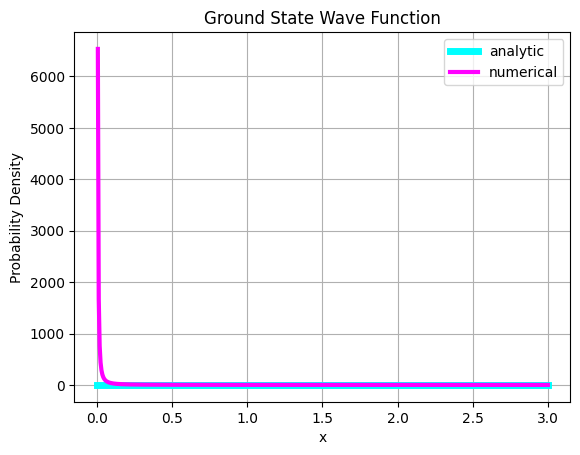

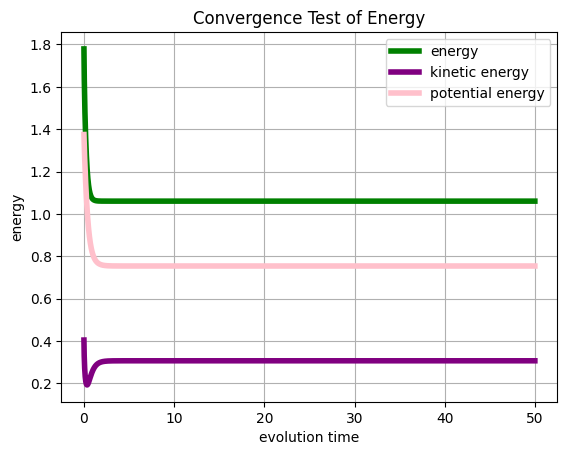

Case: duration = 50.0  time_step = 0.01
Execution Time: 0.7739484310150146
(0.36356341666339165+6.081464398292858e-16j)


In [506]:
import time
import numpy as np
import matplotlib.pyplot as plt

omega = 1.0
num_grid_points = 500
num_steps = 5000
time_step = 0.01
position = 3
duration = time_step * num_steps
x = np.linspace(0, position, num_grid_points)
wave_function = np.sin(x)
dx = x[1] - x[0]
k = np.fft.fftfreq(num_grid_points, dx) * 2 * np.pi  # np.fft.fft() returns frequency in cycles / unit of sample spacing (rad/m here: unit of wave number)
dk = k[1] - k[0]
evolution_time = np.arange(0, duration, time_step)
T = np.zeros(num_steps)
V = np.zeros(num_steps)
E = np.zeros(num_steps)
ground_state_wave_function = np.power(omega/np.pi, 3/4) * np.exp(-0.5 * omega * x**2)
start_time = time.time()

def harmonic_potential(x, omega):
    return 0.5 * omega**2 * x**2

def normalize(wave_function):
    return wave_function / np.sqrt(np.sum(np.absolute(wave_function)**2) * dx)

def potential_propagation(wave_function, omega, time_step):
    return wave_function * np.exp(-0.5 * time_step * omega**2 * x**2)

def kinetic_propagation(wave_function, time_step):
    return np.fft.ifft(np.fft.fft(wave_function) * dx * np.exp(-0.5 * time_step * k**2)) * dk

wave_function = normalize(wave_function)

for step in range(num_steps):
    wave_function = potential_propagation(wave_function, omega, time_step)
    wave_function = kinetic_propagation(wave_function, time_step)
    wave_function = normalize(wave_function)
    T[step] = np.sum(np.conjugate(np.fft.fft(wave_function) * dx) * (0.5 * k**2) * np.fft.fft(wave_function) * dx) * dk / (2 * np.pi)
    V[step] = np.sum(np.conjugate(wave_function) * (0.5 * omega**2 * x**2) * wave_function) * dx
    E[step] = T[step] + V[step]

plt.plot(x, np.abs(ground_state_wave_function)**2, linewidth = 5, color = 'cyan', label = 'analytic' )
plt.plot(x, np.abs(wave_function/x)**2, linewidth = 3, color = 'magenta', label = 'numerical')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Ground State Wave Function')
plt.legend()
plt.grid()
plt.show()

plt.plot(evolution_time, E, linewidth = 4, color = 'green', label = 'energy')
plt.plot(evolution_time, T, linewidth = 4, color = 'purple', label = 'kinetic energy')
plt.plot(evolution_time, V, linewidth = 4, color = 'pink', label = 'potential energy')
plt.xlabel('evolution time')
plt.ylabel('energy')
plt.title('Convergence Test of Energy')
plt.legend()
plt.grid()
plt.show()

end_time = time.time()
interval = end_time - start_time

print(f"Case: duration = {duration}  time_step = {time_step}")
print(f"Execution Time: {interval}")
print(np.sum(np.conjugate(ground_state_wave_function)*wave_function) * dx)

C:\Users\A\AppData\Local\Temp\ipykernel_2472\1324753579.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
  T[data_index] = np.sum(np.conjugate(np.fft.fft(wave_function) * dx) * (0.5 * k**2) * np.fft.fft(wave_function) * dx) * dk / (2 * np.pi)
C:\Users\A\AppData\Local\Temp\ipykernel_2472\1324753579.py:45: ComplexWarning: Casting complex values to real discards the imaginary part
  V[data_index] = np.sum(np.conjugate(wave_function) * (0.5 * omega**2 * x**2) * wave_function) * dx


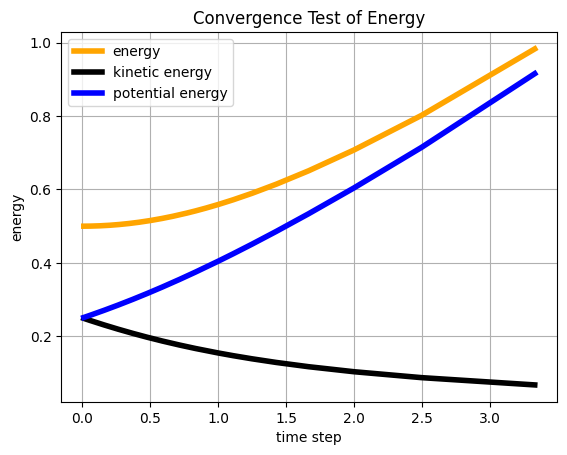

Case: duration = 10  time_step = 0.01
Execution Time: 21.841609954833984


In [495]:
import time
import numpy as np
import matplotlib.pyplot as plt

omega = 1.0
num_grid_points = 500
position = 5
duration = 10
wave_function = np.ones(num_grid_points)
x = np.linspace(-position, position, num_grid_points)
dx = x[1] - x[0]
k = np.fft.fftfreq(num_grid_points, dx) * 2 * np.pi  # np.fft.fft() returns frequency in cycles / unit of sample spacing (rad/m here: unit of wave number)
dk = k[1] - k[0]
data_points = 998
data_index = 0
T = np.zeros(data_points)
V = np.zeros(data_points)
E = np.zeros(data_points)
num_steps = np.linspace(3, 1000, data_points)
time_step_size = duration * np.ones(data_points) / num_steps
ground_state_wave_function = np.power(omega/np.pi, 1/4) * np.exp(-0.5 * omega * x**2)
start_time = time.time()

def harmonic_potential(x, omega):
    return 0.5 * omega**2 * x**2

def normalize(wave_function):
    return wave_function / np.sqrt(np.sum(np.absolute(wave_function)**2) * dx)

def potential_propagation(wave_function, omega, time_step):
    return wave_function * np.exp(-0.5 * time_step * omega**2 * x**2)

def kinetic_propagation(wave_function, time_step):
    return np.fft.ifft(np.fft.fft(wave_function) * dx * np.exp(-0.5 * time_step * k**2)) * dk

wave_function = normalize(wave_function)
 
for num_of_step in np.linspace(3, 1000, data_points):
    time_step = duration / num_of_step
    for step in range(int(num_of_step)):
        wave_function = potential_propagation(wave_function, omega, time_step)
        wave_function = kinetic_propagation(wave_function, time_step)
        wave_function = normalize(wave_function)
    T[data_index] = np.sum(np.conjugate(np.fft.fft(wave_function) * dx) * (0.5 * k**2) * np.fft.fft(wave_function) * dx) * dk / (2 * np.pi)
    V[data_index] = np.sum(np.conjugate(wave_function) * (0.5 * omega**2 * x**2) * wave_function) * dx
    E[data_index] = T[data_index] + V[data_index]    
    data_index = data_index + 1

plt.plot(time_step_size, E, linewidth = 4, color = 'orange', label = 'energy')
plt.plot(time_step_size, T, linewidth = 4, color = 'black', label = 'kinetic energy')
plt.plot(time_step_size, V, linewidth = 4, color = 'blue', label = 'potential energy')
#plt.plot(time_step_size, time_step_size * np.sqrt(time_step_size), linewidth = 2, color = 'green', label = '$\delat t e^{\delta t}$')
plt.xlabel('time step')
plt.ylabel('energy')
plt.title('Convergence Test of Energy')
plt.legend()
plt.grid()
plt.show()

end_time = time.time()
interval = end_time - start_time
print(f"Case: duration = {duration}  time_step = {time_step}")
print(f"Execution Time: {interval}")